# **Loan Analysis**



## A.   Data Preperation







### 1.   Reading data




In [1]:
# importing modules
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import scatter_matrix



In [2]:
# reading the csv file "loans.csv"
df = pd.read_csv("/content/loans.csv")

In [3]:
# preview of the data frame
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
# shape of the data frame
rows , columns = df.shape
print(f"Rows: {rows}\nColumns: {columns}")

Rows: 443
Columns: 8


In [5]:
# statistical inforrmation of the data frame
df.describe()

,client_id,loan_amount,repaid,loan_id,rate
count,443.000000,443.000000,443.000000,443.000000,443.000000
mean,38911.060948,7982.311512,0.534989,11017.101580,3.217156
std,7768.681063,4172.891992,0.499338,581.826222,2.397168
min,25707.000000,559.000000,0.000000,10009.000000,0.010000
25%,32885.000000,4232.500000,0.000000,10507.500000,1.220000
50%,39505.000000,8320.000000,1.000000,11033.000000,2.780000
75%,46109.000000,11739.000000,1.000000,11526.000000,4.750000
max,49624.000000,14971.000000,1.000000,11991.000000,12.620000


In [6]:
# summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


In [7]:
# data types of each column
df.dtypes

client_id        int64
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object




### 2.  NULL values



In [8]:
# finding null values in data frame
df.isna().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

### Findings: There is no null values in our data frame.

## Findings: Goal Feature: loan_amount
### y : loan_amount
### X : loan_type , repaid , loan_start , loan_end , rate.

### 3.   Outliers

<Axes: ylabel='repaid'>

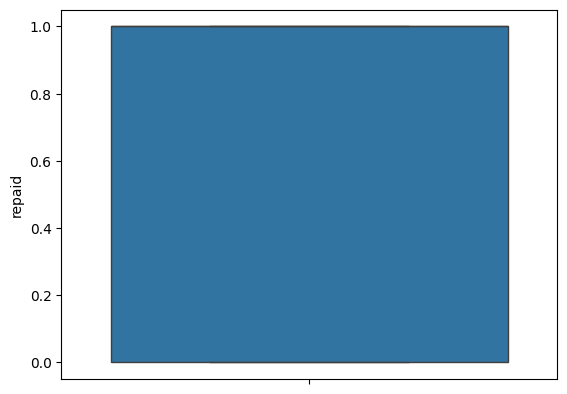

In [9]:
# boxplot for "repaid" column
seaborn.boxplot(df["repaid"])

<Axes: xlabel='repaid', ylabel='Count'>

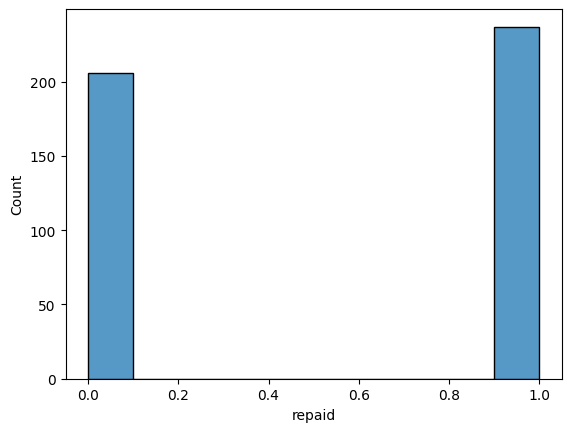

In [10]:
seaborn.histplot(df["repaid"])

<Axes: ylabel='rate'>

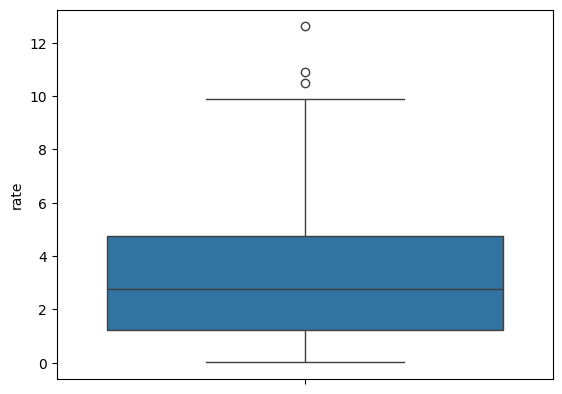

In [11]:
# boxplot for "rate" column
seaborn.boxplot(df["rate"])

<Axes: xlabel='rate', ylabel='Count'>

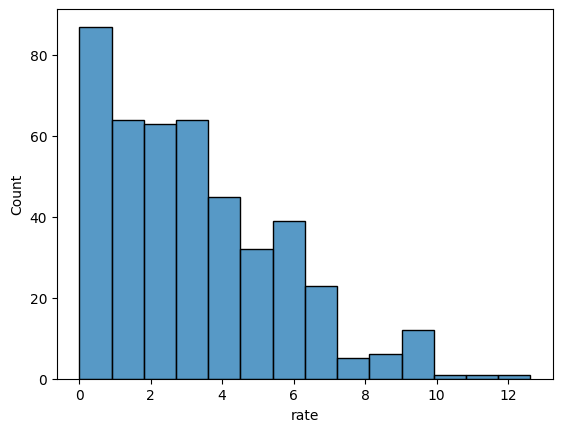

In [12]:
seaborn.histplot(df["rate"])

### Findings: As seen, there are no outliers in any of the columns with numeric data.





### 4.   Variable Transformation
#### In this section we must do 3 things:
1. Drop columns that are not necessary for our model like: client_id, loan_id.
2. Create a new column named 'days' by calculating the number of days that a loan is repaid by taking it from columns loan_start and loan_end.
3. Create new columns for categorical variable "loan_type"

In [13]:
# Dropping unnecessary columns
df.drop(columns=["client_id","loan_id"] , inplace=True)
df.head()

,loan_type,loan_amount,repaid,loan_start,loan_end,rate
0,home,13672,0,2002-04-16,2003-12-20,2.15
1,credit,9794,0,2003-10-21,2005-07-17,1.25
2,home,12734,1,2006-02-01,2007-07-05,0.68
3,cash,12518,1,2010-12-08,2013-05-05,1.24
4,credit,14049,1,2010-07-07,2012-05-21,3.13


In [14]:
# creating the new column "days":
# changing the data type to datetime:
df["loan_start"] = df["loan_start"].astype("datetime64[ns]")
df["loan_end"] = df["loan_end"].astype("datetime64[ns]")

# calculating the number of days for a loan repaimnet:
df["days"] = (df["loan_end"] - df["loan_start"]).dt.days

# dropping the unnecessary columns:
df.drop(columns=["loan_start" , "loan_end"] , inplace=True)

# data frame:
df.head()



,loan_type,loan_amount,repaid,rate,days
0,home,13672,0,2.15,613
1,credit,9794,0,1.25,635
2,home,12734,1,0.68,519
3,cash,12518,1,1.24,879
4,credit,14049,1,3.13,684


In [15]:
# creating new columns for our categorical variable "loan_type"
# label Encoding:
label_encoder = LabelEncoder()
df["loan_type"] = label_encoder.fit_transform(df["loan_type"])
df



,loan_type,loan_amount,repaid,rate,days
0,2,13672,0,2.15,613
1,1,9794,0,1.25,635
2,2,12734,1,0.68,519
3,0,12518,1,1.24,879
4,1,14049,1,3.13,684
...,...,...,...,...,...
438,3,12963,0,2.46,928
439,1,1728,1,5.27,511
440,3,9329,0,5.65,948
441,2,4197,0,4.50,633


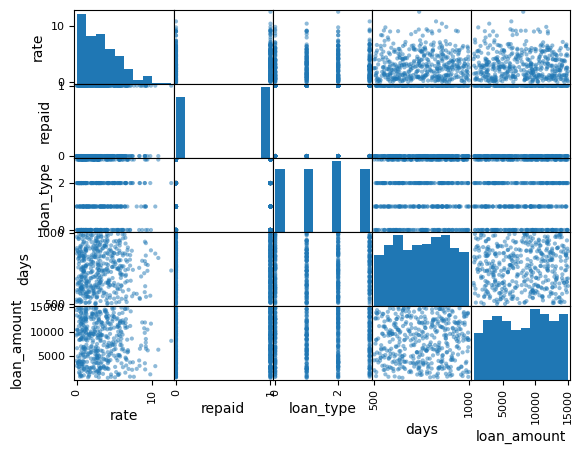

In [16]:
# selecting three numerical features
features = ["rate", "repaid",
            'loan_type',"days","loan_amount" ]

# plotting the scatter matrix
# with the features
scatter_matrix(df[features])
plt.show()

## Target and feature variables
## X and y


In [17]:
# target variable
y = df["loan_amount"]
# features
X = df[["repaid","rate","days","loan_type"]]

X.head()

,repaid,rate,days,loan_type
0,0,2.15,613,2
1,0,1.25,635,1
2,1,0.68,519,2
3,1,1.24,879,0
4,1,3.13,684,1



### 5.   Standardization of numeric data




In [19]:
# getting all of the columns names
columns = X . columns

# MinMax Scaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X=X) , columns = columns)

X_scaled


,repaid,rate,days,loan_type
0,0.0,0.169707,0.224900,0.666667
1,0.0,0.098335,0.269076,0.333333
2,1.0,0.053132,0.036145,0.666667
3,1.0,0.097542,0.759036,0.000000
4,1.0,0.247423,0.367470,0.333333
...,...,...,...,...
438,0.0,0.194290,0.857430,1.000000
439,1.0,0.417129,0.020080,0.333333
440,0.0,0.447264,0.897590,1.000000
441,0.0,0.356067,0.265060,0.666667


### 6. Train Test Split

In [21]:
# train-test split of the dataframe:
X_train, X_test, y_train, y_test = train_test_split (X_scaled , y, test_size=0.20, random_state=1)
print(f"X_train:{X_train.shape} \n y_train:{y_train.shape} \n X_test:{X_test.shape} \n y_test:{y_test.shape}")

X_train:(354, 4) 
 y_train:(354,) 
 X_test:(89, 4) 
 y_test:(89,)


## B. Modelling

### 1. Simple linear regression with one variable



In [22]:
# finding the correlation between variables:
# final dataframe:
df_final = X_scaled.join(y)

# correlation:
df_final[["repaid","rate","days","loan_type","loan_amount"]].corr()

,repaid,rate,days,loan_type,loan_amount
repaid,1.000000,-0.016172,0.003723,0.002284,0.012506
rate,-0.016172,1.000000,0.023930,0.007582,-0.033340
days,0.003723,0.023930,1.000000,0.043847,0.023510
loan_type,0.002284,0.007582,0.043847,1.000000,0.038058
loan_amount,0.012506,-0.033340,0.023510,0.038058,1.000000


Findings: The most correlated variable is the "rate" column.

In [23]:
# Regression model; The "rate" column as the feature column.
regressor_1 = LinearRegression()

# features
features = ["loan_type"]

# fitting the model
regressor_1.fit(X_train[features] , y_train )

# prediction
predictions_1 = regressor_1.predict(X_test[features])

# evaluation
MSE_1 = mean_squared_error(y_test , predictions_1)
print(f"Mean Squared Error : {MSE_1:.2f} ")

MAE_1 = mean_absolute_error(y_test , predictions_1)
print(f"Mean Absolute Error : {MAE_1:.2f} ")

MAPE_1 = mean_absolute_percentage_error(y_test , predictions_1)
print(f"Mean Absolute Precentage Error : {MAPE_1:.2f} ")

R2_score_1 = r2_score(y_test , predictions_1)
print(f"R2 Score : {R2_score_1:.2f} ")


Mean Squared Error : 15193450.36 
Mean Absolute Error : 3240.72 
Mean Absolute Precentage Error : 0.96 
R2 Score : -0.02 




### 2.  Linear regression with multiple variables


In [26]:
# finding the correlation between variables:
# final dataframe:
df_final = X_scaled.join(y)
# correlation:
df_final.corr()

,repaid,rate,days,loan_type,loan_amount
repaid,1.000000,-0.016172,0.003723,0.002284,0.012506
rate,-0.016172,1.000000,0.023930,0.007582,-0.033340
days,0.003723,0.023930,1.000000,0.043847,0.023510
loan_type,0.002284,0.007582,0.043847,1.000000,0.038058
loan_amount,0.012506,-0.033340,0.023510,0.038058,1.000000


Findings: Correlated columns are  "rate", "days", "loan_type", .

In [27]:
# Regression model;
regressor_2 = LinearRegression()

# features
features = ["rate", "days", "loan_type"]

# fitting the model
regressor_2.fit(X_train[features] , y_train )

# prediction
predictions_2 = regressor_2.predict(X_test[features])

# evaluation
MSE_2 = mean_squared_error(y_test , predictions_2)
print(f"Mean Squared Error : {MSE_2:.2f} ")

MAE_2 = mean_absolute_error(y_test , predictions_2)
print(f"Mean Absolute Error : {MAE_2:.2f} ")

MAPE_2 = mean_absolute_percentage_error(y_test , predictions_2)
print(f"Mean Absolute Precentage Error : {MAPE_2:.2f} ")

R2_score_2 = r2_score(y_test , predictions_2)
print(f"R2 Score : {R2_score_2:.2f} ")



Mean Squared Error : 15255706.66 
Mean Absolute Error : 3221.75 
Mean Absolute Precentage Error : 0.95 
R2 Score : -0.03 


### 3.  Polynomial regression


In [28]:
# Regression model;
poly_reg_model = LinearRegression()

# features
features = ["loan_type"]

# Fitting Polynomial Regression to the dataset
poly = PolynomialFeatures(degree=4 , include_bias=False)
poly_features = poly.fit_transform(X_scaled[features])

# train-test split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

# fitting the model
poly_reg_model.fit(X_train , y_train)

# prediction
poly_reg_y_predicted = poly_reg_model.predict(X_test)

# evaluation
MSE_3 = mean_squared_error(y_test , poly_reg_y_predicted)
print(f"Mean Squared Error : {MSE_3:.2f} ")

MAE_3 = mean_absolute_error(y_test , poly_reg_y_predicted)
print(f"Mean Absolute Error : {MAE_3:.2f} ")

MAPE_3 = mean_absolute_percentage_error(y_test , poly_reg_y_predicted)
print(f"Mean Absolute Precentage Error : {MAPE_3:.2f} ")

R2_score_3 = r2_score(y_test , poly_reg_y_predicted)
print(f"R2 Score : {R2_score_3:.2f} ")


Mean Squared Error : 15357679.51 
Mean Absolute Error : 3289.28 
Mean Absolute Precentage Error : 1.02 
R2 Score : -0.00 
